THE MET MUSEUM CAPSTONE CODES

Import Libraries 

In [2]:
import requests
import json
from urllib import request
import pandas as pd
import sqlite3
import os
import imageio 


#### Using SQLite to readin database

In [1]:
os.chdir("C:\\Users\\su\\Desktop\mapi.db")

In [6]:
#sqliteConnection = sqlite3.connect('mapi.db')
#cursor = sqliteConnection.cursor()

In [7]:
#sql = cursor.execute("SELECT * FROM object")

In [8]:
#def q(sql="", params=(), db=sqliteConnection):
   #df =  pd.read_sql_query(sql, db, params=params)
    #return df

In [9]:
#metdata= q("SELECT * FROM object")

#### Saving PrimaryImageSmall to the another directory

In [21]:
#First You need to change the directory
#os.chdir("C:\\Users\\lyh51\\Desktop\\Desktop\\UVA\\MSDS\\CAPSTONE\\Image")


In [23]:
# Testing for downloading first 50 images
#for i in range(0,50):
   # if metdata['primaryImageSmall'][i] != '':
      #  request.urlretrieve(metdata['primaryImageSmall'][i], '%s.%s'%(metdata['objectID'][i],'png'))

In [24]:
import PIL # Python Imaging Libary 



In [25]:
from PIL import Image

In [26]:
#ex_img = Image.open(request.urlretrieve(metdata['primaryImageSmall'][i], '%s.%s'%(metdata['objectID'][i],'png')))
#ex_img = Image.open(request.urlretrieve(https://images.metmuseum.org/CRDImages/dp/web-large/DP873204.jpg))

ex_img = Image.open('test.jpg')
# downloaded one image just for testing purposes 

ex_img.size
# retrieve the size of the image 





(446, 625)

In [16]:
ex_img.width 
#446

446

In [17]:
ex_img.height 
#625

625

In [27]:
dim = (200, 200)
newimg = ex_img.resize(dim)


newimg.save('new.jpg')
# skews and distorts the picture
# new.jpg is saved in the same directory as the jupyter notebook



#http://2017.compciv.org/guide/topics/python-nonstandard-libraries/pillow.html
# https://towardsdatascience.com/image-pre-processing-c1aec0be3edf
#https://pillow.readthedocs.io/en/latest/reference/ImageOps.html#PIL.ImageOps.posterize
#https://medium.com/analytics-vidhya/gaussian-blurring-with-python-and-opencv-ba8429eb879b

In [17]:
import numpy as np
import imageio
import imgaug as ia
import matplotlib.pyplot as plt
from PIL import Image 
import cv2, sys

In [4]:
#from PIL import Image

old_img = Image.open('test.jpg')

new_width = 224
new_height = int(old_img.height * (new_width / old_img.width))
new_height

newimg = old_img.resize((new_width, new_height))
newimg.save('new_image2.jpg')

#200 × 280 pixels







In [5]:
# using .thumbnail 
# initial (446, 625)
img = Image.open('test.jpg')
imgAnt = Image.open('test.jpg')
newsize = (224, 224)
img.thumbnail(newsize)
imgAnt.thumbnail(newsize,Image.ANTIALIAS)
img.size



img.save('thumbnailMethod.jpg')
imgAnt.save('thumbnailANT.jpg')
# same size #(142, 200)


#if file.endswith(".JPG") or file.endswith(".PNG"):
    
#Image.save(fp, format=None)
    
#import shutil
#shutil.move(file_name, 'full/path/to/dst/')
#print ("resizing process complete.")

#Sources 
#https://towardsdatascience.com/image-augmentation-examples-in-python-d552c26f2873
#https://github.com/aleju/imgaug



In [6]:
# Try maybe downloading the image in case the CS webserver goes down.
#img_url = 'http://www.cs.virginia.edu/~vicente/images/google_android.jpg'
img_url = 'https://images.metmuseum.org/CRDImages/ep/web-large/DT1567.jpg'
img = imageio.imread(img_url)

#Imageio is a Python library that provides an easy interface to read and write a wide range of image data, 
#including animated images, video, volumetric data, and scientific formats.

# Show the image size.
print('Image size: ', img.shape)



Image size:  (474, 599, 3)


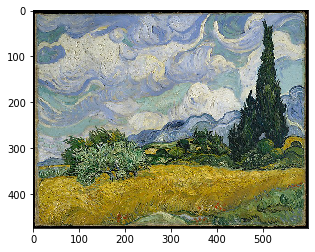

In [7]:
# Plot the image.
def display_image(img):
  plt.figure()
  plt.imshow(img)
  plt.grid(False)
  plt.show()
  
display_image(img)

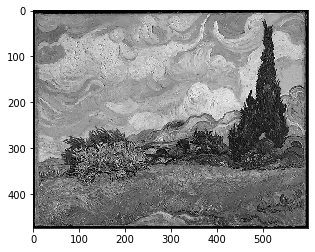

In [8]:
# Converting image to grayscale.
img = img.astype('float')
img = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3.0

# Plot the image.
def display_image(img):
  plt.figure()
  plt.gray()
  plt.imshow(img)
  plt.grid(False)
  plt.show()

display_image(img)

Augmented:


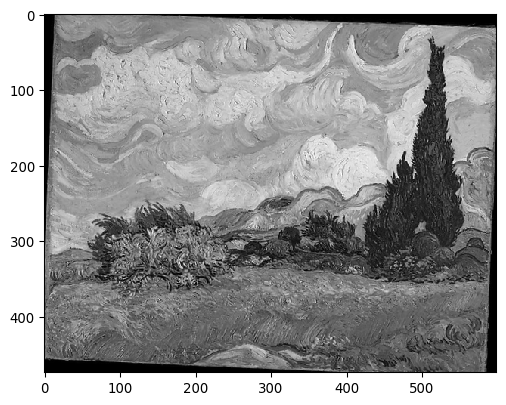

In [9]:
from imgaug import augmenters as iaa
ia.seed(4)

rotate = iaa.Affine(rotate=(-25, 25))
image_aug = rotate.augment_image(img)

print("Augmented:")
ia.imshow(image_aug)

#We keep it simple here and use that technique to simply rotate the image by a random value between -25° and +25°.

Augmented batch:


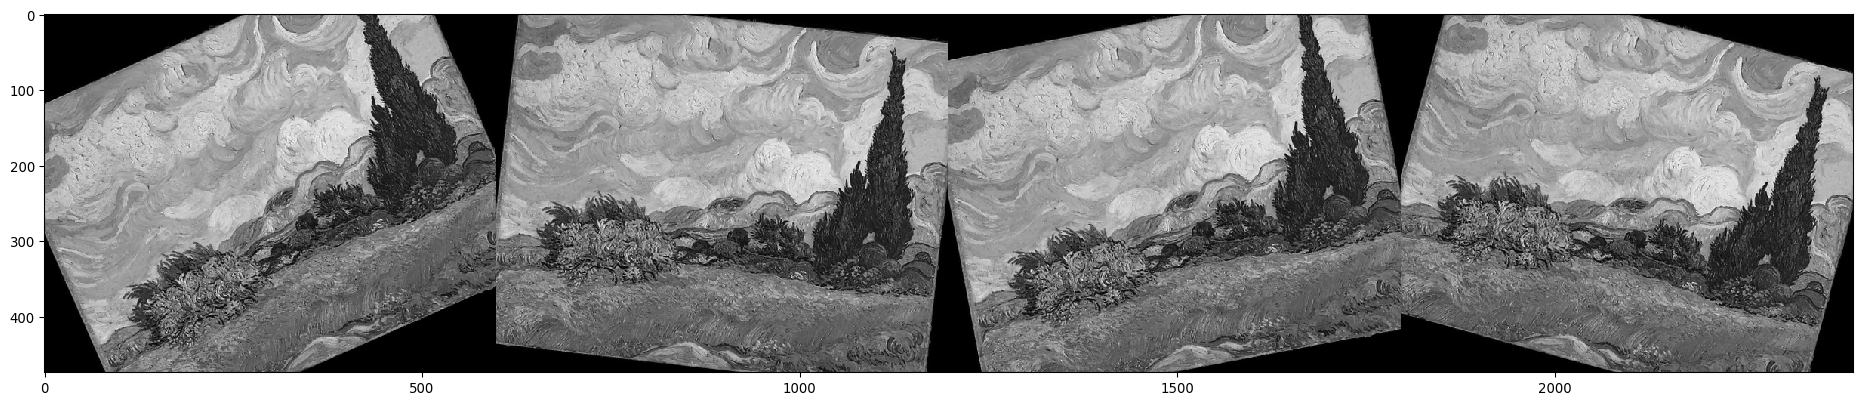

In [10]:
images = [img, img, img, img]
images_aug = rotate.augment_images(images)

print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

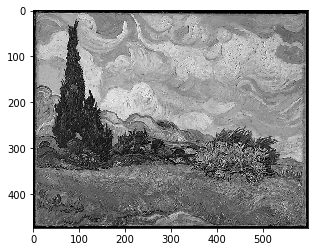

In [11]:
# Flip the image - using numpy 

flipped_img = np.fliplr(img)
plt.imshow(flipped_img)
plt.show()


In [ ]:




#def crop_center(pil_img, crop_width, crop_height):
   # img_width, img_height = pil_img.size
    #return pil_img.crop(((img_width - crop_width) // 2,
                        # (img_height - crop_height) // 2,
                        # (img_width + crop_width) // 2,
                        # (img_height + crop_height) // 2))







# Gaussian Blur 

Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise. The visual effect of this blurring technique is a smooth blur resembling that of viewing the image through a translucent screen, distinctly different from the bokeh effect produced by an out-of-focus lens or the shadow of an object under usual illumination. Gaussian smoothing is also used as a pre-processing stage in computer vision algorithms in order to enhance image structures at different scales.
Computers view an image as just a large 2-dimensional matrix of numbers. Each number represents the color of a pixel.



Image noise manifests itself as random variations in the brightness or color of pixels in an image, or speckles that are similar to film grain on analogue cameras. If image noise is significant enough, it can potentially interfere with a computer vision system’s functionality, such as the edge-detection algorithm for lane detection in a self-driving car.



In [62]:
# ----------------------------------
# Remove noise
# Gaussian

img_url = 'https://images.metmuseum.org/CRDImages/ep/web-large/DT1567.jpg'
img = imageio.imread(img_url)
no_noise = []
for i in range(len(img)):
    blur = cv2.GaussianBlur(img[i], (5, 5), 0)
    no_noise.append(blur)


image = no_noise[1]
display(img, image, 'Original', 'Blurred')





Array([[[2, 0, 1],
        [0, 0, 0],
        [0, 1, 3],
        ...,
        [0, 0, 5],
        [1, 2, 7],
        [1, 0, 5]],

       [[4, 3, 0],
        [1, 0, 0],
        [0, 1, 0],
        ...,
        [0, 1, 6],
        [0, 0, 5],
        [0, 0, 4]],

       [[1, 1, 0],
        [1, 1, 0],
        [0, 1, 0],
        ...,
        [0, 0, 4],
        [5, 4, 9],
        [0, 0, 4]],

       ...,

       [[0, 1, 6],
        [1, 5, 8],
        [0, 0, 2],
        ...,
        [0, 1, 2],
        [2, 6, 7],
        [0, 1, 0]],

       [[0, 3, 8],
        [0, 1, 4],
        [0, 0, 2],
        ...,
        [0, 1, 0],
        [0, 2, 0],
        [0, 2, 1]],

       [[1, 5, 8],
        [0, 2, 3],
        [0, 0, 2],
        ...,
        [0, 2, 0],
        [0, 2, 0],
        [0, 3, 4]]], dtype=uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 2, 2],
       [1, 1, 2],
       [1, 1, 2]], dtype=uint8)

'Original'

'Blurred'

In [59]:
display(image)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 2, 2],
       [1, 1, 2],
       [1, 1, 2]], dtype=uint8)

In [58]:
#Gaussian blurring is used to reduce noise in an image, let’s first introduce some noise:
import os
os.environ['OPENCV_IO_MAX_IMAGE_PIXELS']=str(2**64)
import cv2
import numpy as np


image = np.array(image)

#img_url = 'https://images.metmuseum.org/CRDImages/ep/web-large/DT1567.jpg'
#img = imageio.imread(img_url)

#img_blur = cv2.imread('https://images.metmuseum.org/CRDImages/ep/web-large/DT1567.jpg')


img_new = np.array(array).astype(np.uint8)
cv2.resize(img_new, new_size, interpolation=cv2.INTER_LINEAR
           
dst = np.empty_like(img_new) #create empty array the size of the image
noise = cv2.randn(dst, (0,0,0), (20,20,20)) #add random img noise

# Pass img through noise filter to add noise
pup_noise = cv2.addWeighted(pup, 0.5, noise, 0.5, 50) 

# Blurring function; kernel=15, sigma=auto
pup_blur = cv2.GaussianBlur(pup_noise, (15, 15), 0)

cv2.imshow('Img', pup_blur)
cv2.waitKey(0)
cv2.destroyAllWindows



SyntaxError: invalid syntax (<ipython-input-58-12b2645804be>, line 19)

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img_url = 'https://images.metmuseum.org/CRDImages/ep/web-large/DT1567.jpg'
img = cv2.imread(img_url)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

error: OpenCV(4.1.1) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'locateROI'


In [61]:
blur = cv2.GaussianBlur(img,(5,5),0)

error: OpenCV(4.1.1) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'locateROI'


In [ ]:
def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))